In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
drug = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",
                  names=["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsiveness",
                         "SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth",
                         "Mushrooms","Nicotine","Semer","Vsa"])


In [ ]:
drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,Vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
drug.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'Vsa'],
      dtype='object')

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1885 non-null   int64  
 1   Age            1885 non-null   float64
 2   Gender         1885 non-null   float64
 3   Education      1885 non-null   float64
 4   Country        1885 non-null   float64
 5   Ethnicity      1885 non-null   float64
 6   Nscore         1885 non-null   float64
 7   Escore         1885 non-null   float64
 8   Oscore         1885 non-null   float64
 9   Ascore         1885 non-null   float64
 10  Cscore         1885 non-null   float64
 11  Impulsiveness  1885 non-null   float64
 12  SS             1885 non-null   float64
 13  Alcohol        1885 non-null   object 
 14  Amphet         1885 non-null   object 
 15  Amyl           1885 non-null   object 
 16  Benzos         1885 non-null   object 
 17  Caff           1885 non-null   object 
 18  Cannabis

In [ ]:
drug.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:

#check if any column or row contain a Nan value
drug.isna().sum()

ID               0
Age              0
Gender           0
Education        0
Country          0
Ethnicity        0
Nscore           0
Escore           0
Oscore           0
Ascore           0
Cscore           0
Impulsiveness    0
SS               0
Alcohol          0
Amphet           0
Amyl             0
Benzos           0
Caff             0
Cannabis         0
Choc             0
Coke             0
Crack            0
Ecstacy          0
Heroin           0
Ketamine         0
Legalh           0
LSD              0
Meth             0
Mushrooms        0
Nicotine         0
Semer            0
Vsa              0
dtype: int64

In [ ]:
drug.dtypes

ID                 int64
Age              float64
Gender           float64
Education        float64
Country          float64
Ethnicity        float64
Nscore           float64
Escore           float64
Oscore           float64
Ascore           float64
Cscore           float64
Impulsiveness    float64
SS               float64
Alcohol           object
Amphet            object
Amyl              object
Benzos            object
Caff              object
Cannabis          object
Choc              object
Coke              object
Crack             object
Ecstacy           object
Heroin            object
Ketamine          object
Legalh            object
LSD               object
Meth              object
Mushrooms         object
Nicotine          object
Semer             object
Vsa               object
dtype: object

In [ ]:
feature_names=drug.columns

In [ ]:
drug_copy=drug
drug_copy

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,Vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [ ]:
feature_names

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'Vsa'],
      dtype='object')

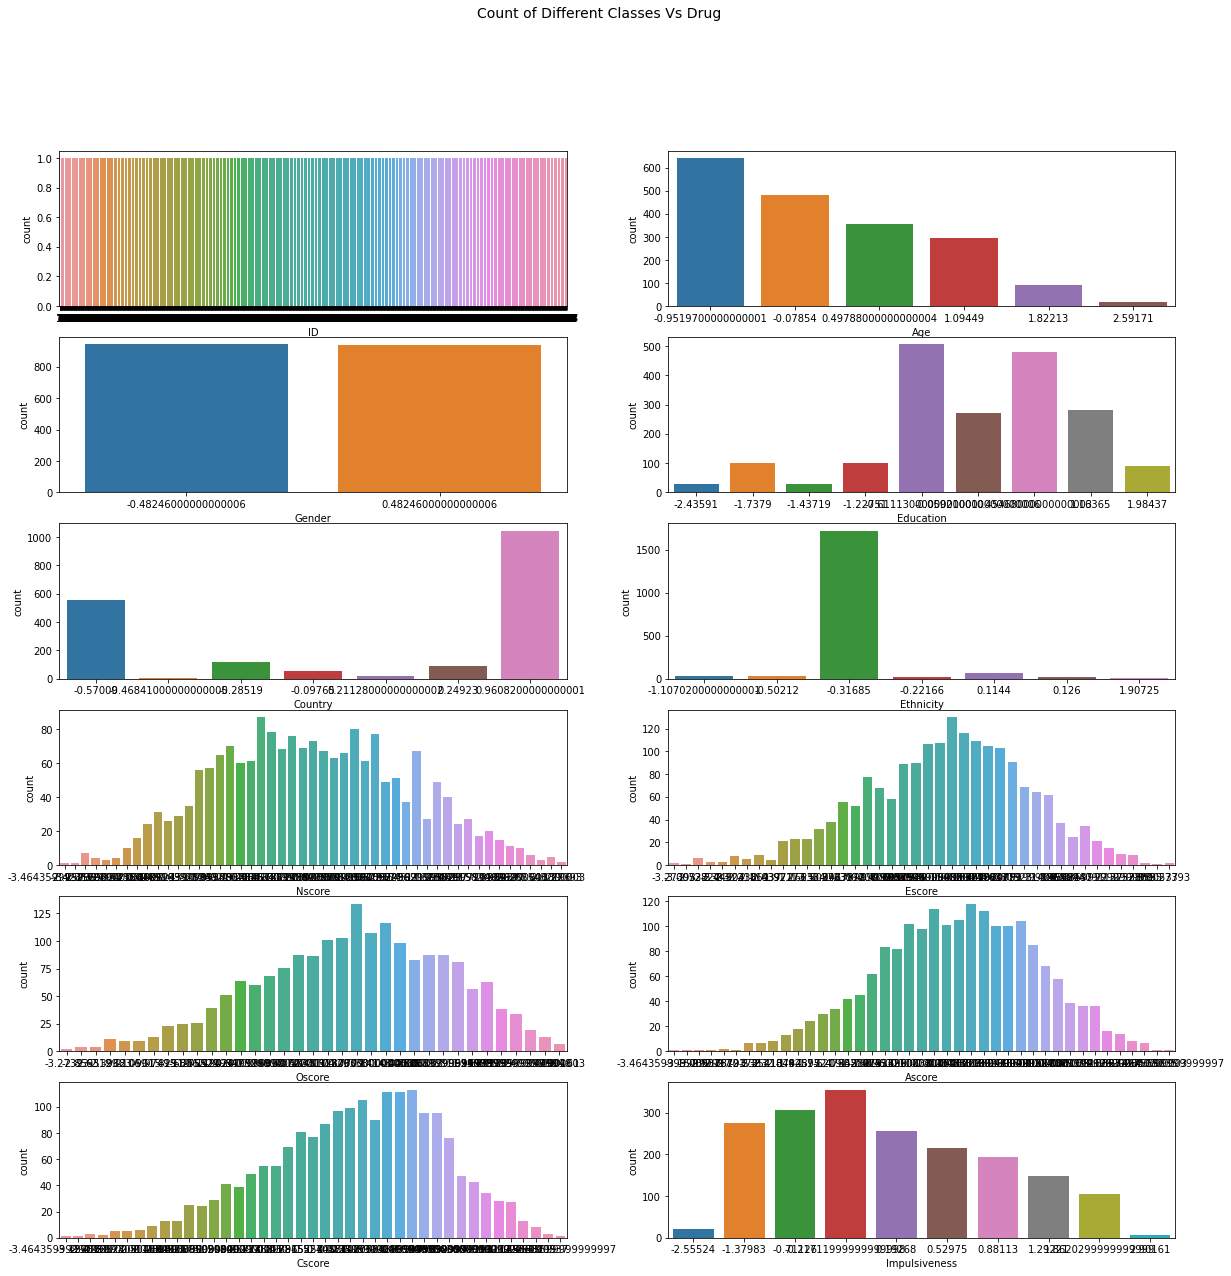

In [ ]:
fig, axes = plt.subplots(6,2,figsize = (20,20))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(6):
    for j in range(2):
        sns.countplot(x=feature_names[k], data=drug_copy,ax=axes[i][j])
        k+=1


plt.show()

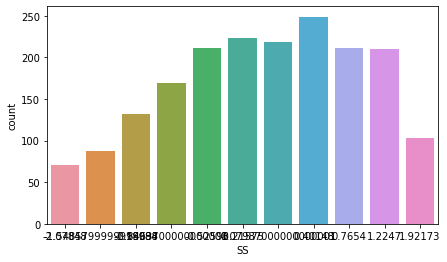

In [ ]:
 plt.figure(figsize = (7,4))
 sns.countplot(x=feature_names[12], data=drug_copy)
 plt.show()

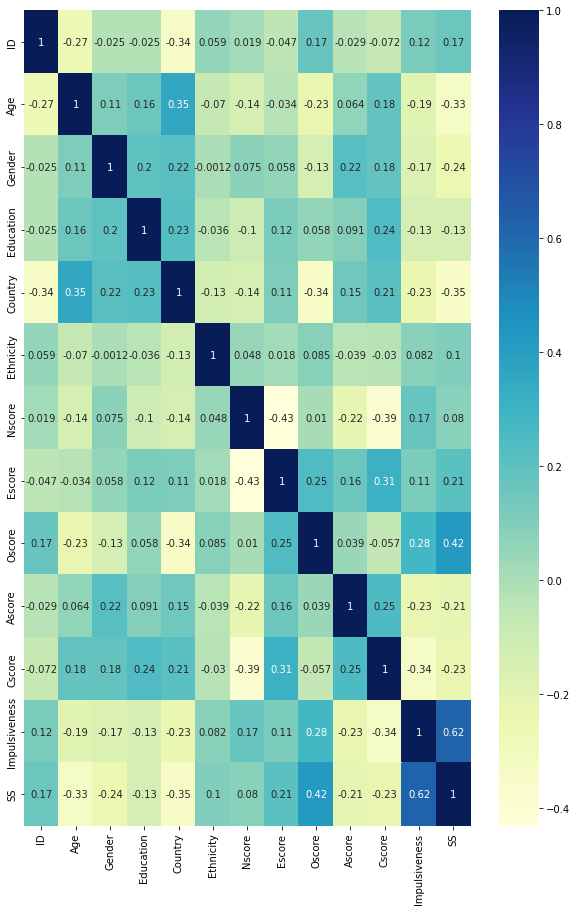

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (10, 15))

sns.heatmap(drug_copy[feature_names].corr(), annot = True, cmap="YlGnBu")
plt.show()

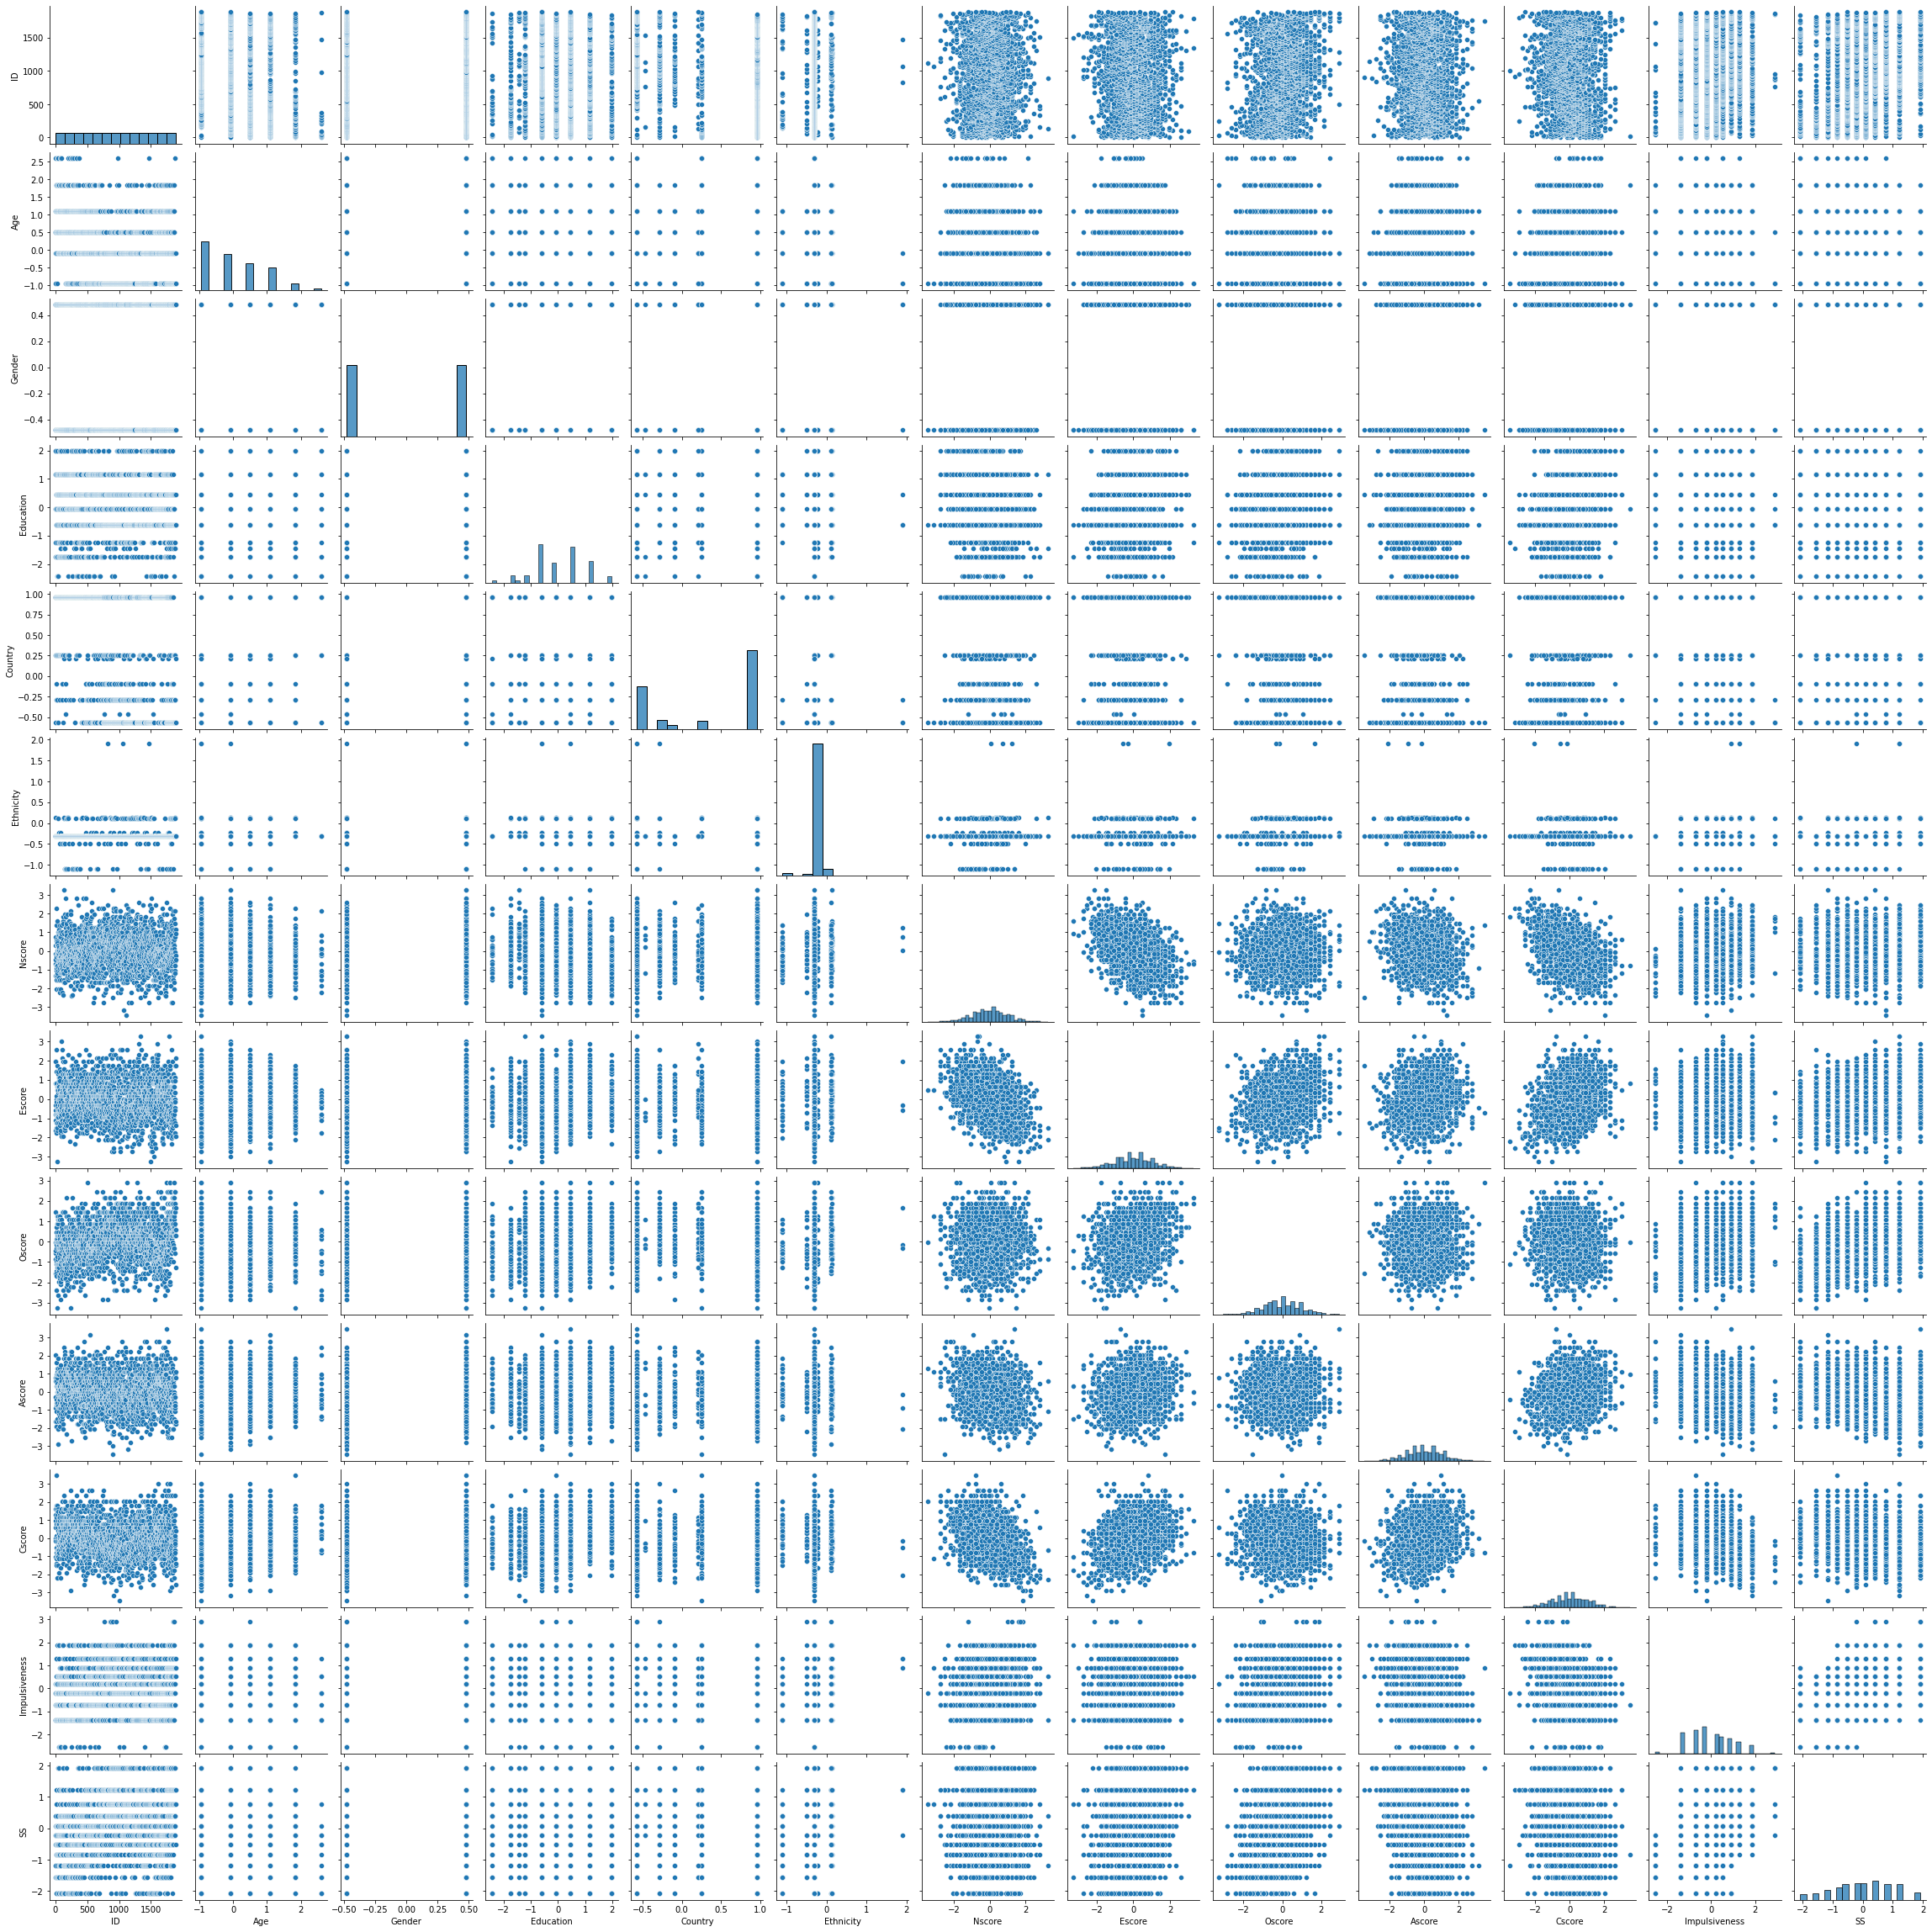

In [ ]:
sns.pairplot(drug_copy)
plt.show()

In [ ]:
columns=[]
for i in drug.columns:
  if drug[i].dtype=='object':
    columns.append(i)



In [ ]:
columns

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstacy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'Semer',
 'Vsa']

In [ ]:
#def dummies(columns,drug_copy):
    #temp = pd.get_dummies(drug_copy[columns], drop_first = True,prefix=columns,prefix_sep='_')
    #drug_copy = pd.concat([drug_copy, temp], axis = 1)
    #drug_copy.drop([columns], axis = 1, inplace = True)
    #return drug_copy



#for n in range (len(columns)):
  #drug_copy=dummies(columns[n],drug_copy)

In [ ]:
# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    drug_copy[column] = le.fit_transform(drug_copy[column])

In [ ]:

for column in columns:
    le = LabelEncoder()
    drug[column] = le.fit_transform(drug[column])

In [ ]:

cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

          

In [ ]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(columns)):
    drug_copy.loc[((drug_copy[columns[i]]==0) | (drug_copy[columns[i]]==1)),cp[i]] = 'Non-user'
    drug_copy.loc[((drug_copy[columns[i]]==2) | (drug_copy[columns[i]]==3) | (drug_copy[columns[i]]==4) | (drug_copy[columns[i]]==5) | (drug_copy[columns[i]]==6)),cp[i]] = 'User'

In [ ]:
count_of_users = []
count_of_non_users = []

In [ ]:

for i in range(len(columns)):
    s = drug_copy.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

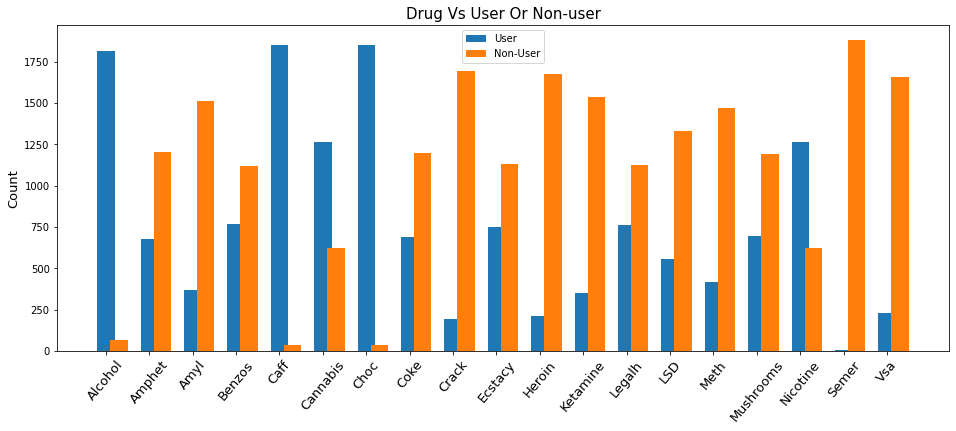

In [ ]:
bins = np.arange(1,20,1)
plt.figure(figsize=(16,6))
plt.bar(bins+0,count_of_users,width=0.4,label ='User')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User')
plt.xticks(bins,columns,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=15)
plt.legend()

          

In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS']
predicted_class_names = ['User_Benzos']

X = drug_copy[feature_col_names].values
y = drug_copy[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
drug_copy['User_Benzos'].iunique()

AttributeError: ignored

In [ ]:
y_test[:5]

array([['Non-user'],
       ['Non-user'],
       ['User'],
       ['Non-user'],
       ['User']], dtype=object)

In [ ]:
le2 = LabelEncoder()
y_train = le2.fit_transform(y_train)
y_test=le2.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve

In [ ]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
y_t = y_test

In [ ]:
for i in y_test:
  if i=="User":
    i=1
  else:
   i=0

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import roc_curve,auc

def report_performance(model):

    model_test = model.predict(X_test)

    
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

### DECISION TREE BINARY CLASSIFIER



Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       336
           1       0.54      0.53      0.53       230

    accuracy                           0.62       566
   macro avg       0.61      0.61      0.61       566
weighted avg       0.62      0.62      0.62       566



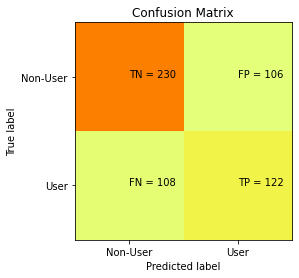

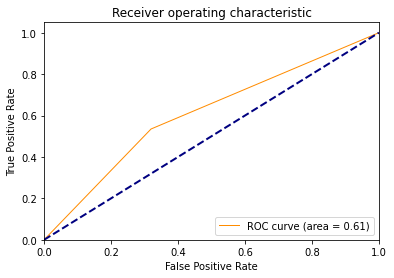

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state=12)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
pred = clf_dtc.predict(X_test)
accu = metrics.accuracy_score(y_test,pred)

### hyperparameter tuning


In [ ]:
# Import
from  sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(2,20))
dt=DecisionTreeClassifier()
max_depth_range=list(range(1,30))
max_feature_range=list(range(2,12))
# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
keys=["max_depth","min_samples_split","max_features","criterion"]
values=[max_depth_range,sample_split_range,max_feature_range,['gini','entropy']]
param_grid = dict(zip(keys, values))
# instantiate the grid
grid = GridSearchCV(dt, param_grid, cv=7, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='accuracy')

In [ ]:
# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.6997475112976632
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 9, 'min_samples_split': 18}
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=9,
                       min_samples_split=18)




Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       336
           1       0.63      0.68      0.65       230

    accuracy                           0.70       566
   macro avg       0.70      0.70      0.70       566
weighted avg       0.71      0.70      0.71       566



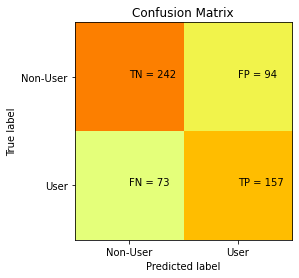

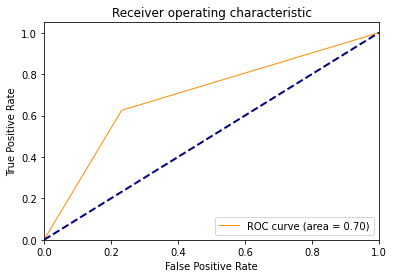

In [ ]:
model_final = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=9,
                       min_samples_split=18)
model_final.fit(X_train, y_train.ravel())
report_performance(model_final) 
roc_curves(model_final)
pred = model_final.predict(X_test)
accu = metrics.accuracy_score(y_test,pred)

In [ ]:
k = model_final.predict(X_train)

In [ ]:
train_accuracy = metrics.accuracy_score(y_train,k)
test_accu = metrics.accuracy_score(y_test,pred)

In [ ]:
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accu)

Train accuracy:  0.7179681576952237
Test accuracy:  0.7049469964664311


### DRUG 2


In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS']
predicted_class_names = ['User_Legalh']

X = drug_copy[feature_col_names].values
y = drug_copy[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
le2 = LabelEncoder()
y_train = le2.fit_transform(y_train)
y_test=le2.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       322
           1       0.71      0.59      0.64       244

    accuracy                           0.72       566
   macro avg       0.72      0.70      0.70       566
weighted avg       0.72      0.72      0.71       566



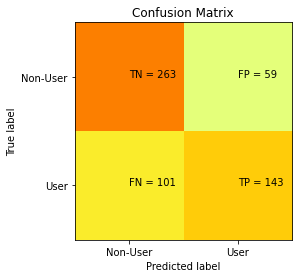

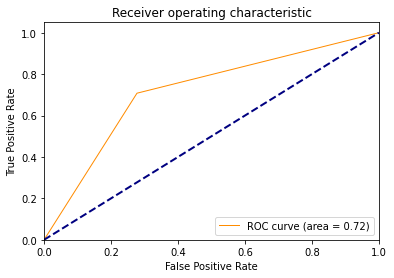

In [ ]:
model_final2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_split=15)
model_final2.fit(X_train, y_train.ravel())
report_performance(model_final2) 
roc_curves(model_final2)
pred = model_final2.predict(X_test)
accu = metrics.accuracy_score(y_test,pred)

In [ ]:
k = model_final.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train,k)
test_accu = metrics.accuracy_score(y_test,pred)
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accu)

Train accuracy:  0.6868840030326004
Test accuracy:  0.7173144876325088


# ATTEMPT TO MULTICLASS CLASSIFICATION

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",
                  names=["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsiveness",
                         "SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth",
                         "Mushrooms","Nicotine","Semer","Vsa"])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS']
predicted_class_names = ['Cannabis']

X = df[feature_col_names]
y = df[predicted_class_names]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
X_train1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
236,-0.07854,0.48246,1.16365,0.96082,-0.31685,1.49158,0.32197,-0.17779,0.43852,0.41594,0.19268,-0.21575
551,-0.95197,0.48246,1.16365,0.96082,-0.31685,1.72012,-1.50796,-0.17779,0.76096,0.25953,-0.21712,-1.18084
1760,-0.95197,0.48246,0.45468,-0.28519,-0.31685,-0.79151,-1.09207,1.88511,0.28783,3.00537,-0.21712,1.22470
865,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-0.05188,1.28610,1.43533,0.76096,2.04506,0.52975,1.22470
208,0.49788,0.48246,0.45468,0.96082,-0.31685,0.13606,0.00332,-0.17779,-0.30172,-0.00665,0.52975,1.22470


In [ ]:
X_test1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
307,0.49788,-0.48246,1.16365,0.96082,-0.31685,-0.79151,0.16767,-0.17779,0.59042,0.41594,-1.37983,-2.07848
382,1.09449,0.48246,0.45468,0.96082,-0.31685,0.13606,-0.30033,-0.45174,1.11406,0.75830,-2.55524,-0.52593
462,-0.95197,0.48246,0.45468,0.96082,-0.31685,0.31287,-0.80615,1.06238,0.76096,0.93949,0.19268,-0.21575
1741,1.82213,0.48246,-0.61113,0.96082,-0.31685,-0.46725,-0.94779,-1.42424,0.43852,-0.00665,-0.71126,-0.52593
917,-0.95197,-0.48246,-1.22751,0.24923,-0.31685,0.22393,1.45421,2.15324,-0.30172,-1.01450,1.86203,1.92173


In [ ]:
y_train1.head()

,Cannabis
236,CL0
551,CL0
1760,CL4
865,CL6
208,CL6


In [ ]:
y_test1.head()

,Cannabis
307,CL0
382,CL0
462,CL3
1741,CL0
917,CL6


In [ ]:
y_train1.Cannabis.unique()

array(['CL0', 'CL4', 'CL6', 'CL5', 'CL1', 'CL3', 'CL2'], dtype=object)

In [ ]:
y_train1.Cannabis.value_counts()

CL6    316
CL0    290
CL2    190
CL1    157
CL5    137
CL3    132
CL4     97
Name: Cannabis, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(y_train1,x=y_train1.Cannabis)
fig.show()

In [ ]:
#Merging data columns 
def merge(df):
    
    df['Cannabis'].replace(to_replace='CL4',value='CL3',inplace=True)
    


In [ ]:
merge(y_train1)

In [ ]:
y_train1 = y_train1.drop("Ben",axis=1)

AttributeError: ignored

In [ ]:
y_test11 = pd.DataFrame(y_test1)
y_test11.head()

,Cannabis
307,CL0
382,CL0
462,CL3
1741,CL0
917,CL6


In [ ]:
 #"Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
y_train1=ohe.fit_transform(y_train1)
y_test1=ohe.transform(y_test1).toarray()

In [ ]:
y_train1.dtype

dtype('float64')

In [ ]:
ohe.categories_

[array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object)]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
 from sklearn.metrics import accuracy_score

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train1,y_train1)
pred = clf.predict(X_test1)
#print(pred)
accu = metrics.accuracy_score(y_test1,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
accu

0.33568904593639576

In [ ]:
model_test = clf.predict(X_test1)
print("\n\nClassification Report: ")
print(metrics.classification_report(y_test1, model_test)) #cm = metrics.confusion_matrix(y_test, model_test)


    
    




Classification Report: 
              precision    recall  f1-score   support

         CL0       0.43      0.65      0.52       123
         CL1       0.19      0.22      0.21        50
         CL2       0.17      0.14      0.16        76
         CL3       0.18      0.18      0.18        79
         CL4       0.00      0.00      0.00        43
         CL5       0.14      0.10      0.12        48
         CL6       0.45      0.45      0.45       147

    accuracy                           0.33       566
   macro avg       0.22      0.25      0.23       566
weighted avg       0.29      0.33      0.30       566



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test1, pred)

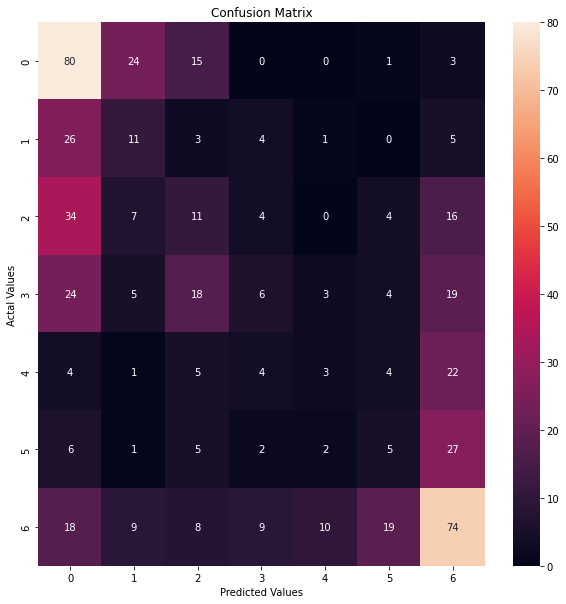

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train1,y_train1)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

Best leaf_size: 1
Best p: 2
Best n_neighbors: 27


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
best_model.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=27)

In [ ]:
clf = KNeighborsClassifier(leaf_size=1, n_neighbors=27,weights='uniform',metric='minkowski')
clf.fit(X_train1,y_train1)
pred = clf.predict(X_test1)
#print(pred)
accu = metrics.accuracy_score(y_test1,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
accu

0.4134275618374558

In [ ]:
import seaborn as keny

### DRUG 2

In [ ]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS']
predicted_class_names = ['Nicotine']

X = df[feature_col_names]
y = df[predicted_class_names]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
clf = KNeighborsClassifier(leaf_size=1, n_neighbors=27,weights='uniform',metric='minkowski')
clf.fit(X_train2,y_train2)
pred = clf.predict(X_test2)
#print(pred)
accu = metrics.accuracy_score(y_test2,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
accu

0.4010600706713781

In [ ]:
print(metrics.classification_report(y_test1, pred))

              precision    recall  f1-score   support

         CL0       0.49      0.77      0.60       123
         CL1       0.38      0.36      0.37        50
         CL2       0.20      0.16      0.18        76
         CL3       0.00      0.00      0.00        79
         CL4       0.00      0.00      0.00        43
         CL5       0.17      0.02      0.04        48
         CL6       0.43      0.73      0.54       147

    accuracy                           0.41       566
   macro avg       0.24      0.29      0.25       566
weighted avg       0.29      0.41      0.33       566



In [ ]:
cm = confusion_matrix(y_test1, pred)

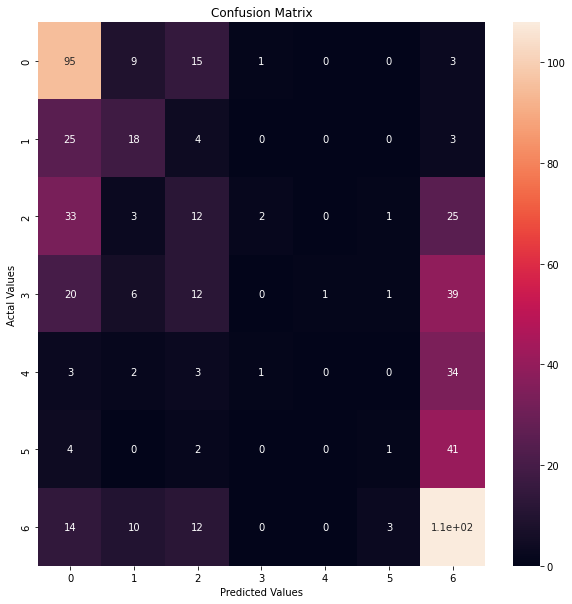

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Decision Tree example with alcohol
#'weights' : ['uniform','distance'],
#'metric' : ['minkowski','euclidean','manhattan']
